In [102]:
import pandas as pd
from fastapi import FastAPI
import ast
import json
from typing import Optional, List

df=pd.read_csv("Movies/movies_dataset.csv", dtype={"popularity": str})


CREACION DEL DF Y TRANSFORMACIONES

In [103]:
# Cargar el archivo credits.csv
credits_df = pd.read_csv("Movies/credits.csv")

df.drop([19730,29503,35587], inplace=True) #Elimino esas 3 filas debido a que dan error, al revisarlas manualmente se ve que les falta informacion

#Cambio el valor del id a int despues de eliminar las 3 filas
df['id'] = df['id'].astype(int)
credits_df['id'] = credits_df['id'].astype(int)
# Uno los DataFrames en base a la columna 'id'
df = pd.merge(df, credits_df, on='id', how='left')



In [104]:
#Transformacion 1

def clear_dict(cadena): #Funcion para pasar los str a dict
        if cadena and isinstance(cadena, str):
                if isinstance(cadena, (dict, list)):
                        return cadena
                try:
                        cadena = ast.literal_eval(cadena)
                except (ValueError, SyntaxError):
                        cadena = json.loads(cadena.replace("'", '"'))
                return cadena
        

df["belongs_to_collection"] = df["belongs_to_collection"].apply(clear_dict) #Se aplica la funcion, y se guardan
df["genres"] = df["genres"].apply(clear_dict)
df["production_companies"] = df["production_companies"].apply(clear_dict)
df["production_countries"] = df["production_countries"].apply(clear_dict)
df["spoken_languages"] = df["spoken_languages"].apply(clear_dict)
df["cast"] = df["cast"].apply(clear_dict)
df["crew"] = df["crew"].apply(clear_dict)


In [105]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,False,None,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,False,None,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[{'cast_id': 1, 'character': 'Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."


In [106]:
#Transformacion 2

df["revenue"]=df["revenue"].astype(float)

df["budget"]=df["budget"].astype(float)

df["revenue"]=df["revenue"].fillna(0)

df["budget"]=df["budget"].fillna(0)

df["popularity"]=df["popularity"].astype(float)

df["title"]=df["title"].astype(str)


In [107]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,False,None,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,False,None,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[{'cast_id': 1, 'character': 'Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."


In [108]:
#Transformacion 3
df["release_date"] = pd.to_datetime(df["release_date"], format='%Y-%m-%d',errors='coerce') #Debido a un error, se agrego el error="coerce"
df = df.dropna(subset="release_date")

# Crear la columna release_year
df["release_year"] = df["release_date"].dt.year

In [9]:
df.dropna([19730,29503,35587], inplace=True) #Elimino esas 3 filas debido a que dan error, al revisarlas manualmente se ve que les falta informacion

TypeError: DataFrame.dropna() takes 1 positional argument but 2 positional arguments (and 1 keyword-only argument) were given

In [109]:
#Transformacion 4
df['return'] = df.apply(lambda row: row['revenue'] / row['budget'] if row['budget'] > 0 else 0, axis=1)

In [110]:
#Transformacion 5
df.drop("video", axis=1, inplace=True)
df.drop("imdb_id", axis=1, inplace=True)
df.drop("adult", axis=1, inplace=True)
df.drop("original_title", axis=1, inplace=True)
df.drop("poster_path", axis=1, inplace=True)
df.drop("homepage", axis=1, inplace=True)

FUNCIONES

In [111]:
app= FastAPI()
app.title = "Movies List"
app.version = "1.0.0"

In [112]:
#Funcion 1
meses = { 'enero': 1,
          'febrero': 2, 
          'marzo': 3, 
          'abril': 4, 
          'mayo': 5, 
          'junio': 6, 
          'julio': 7, 
          'agosto': 8, 
          'septiembre': 9, 
          'octubre': 10, 
          'noviembre': 11, 
          'diciembre': 12 } #Designo a cada mes su respectivo valor numerico

@app.get('/movies/reales_date')
def cantidad_filmaciones_mes(mes: str): # Convertir el nombre del mes a minúsculas 
     mes = mes.lower() # Verificar que el mes es válido 
     if mes not in meses: return {"error": "Mes inválido. Por favor, ingrese un mes en español correctamente."} # Obtener el número del mes 
     mes_num = meses[mes] # Filtrar las películas por el mes 
     peliculas_mes = df[df['release_date'].dt.month == mes_num] # Obtener la cantidad de películas 
     cantidad = peliculas_mes.shape[0] 
     return {"mes": mes, "cantidad": cantidad, "peliculas": peliculas_mes['title'].tolist()}


In [113]:
#Funcion 2
# Se designa a cada dia de la semana su respectivo valor numerico
dias_semana = {
    'lunes': 0,
    'martes': 1,
    'miércoles': 2,
    'jueves': 3,
    'viernes': 4,
    'sábado': 5,
    'domingo': 6
}

# Se crea el endpoint para obtener la cantidad de filmaciones por dia
@app.get('/movies/release_date_day')
def cantidad_filmaciones_dia(dia: str):
    dia = dia.lower()
    if dia not in dias_semana:
        return {"error": "Día inválido. Por favor, ingrese un día en español correctamente."}
    dia_num = dias_semana[dia]
    peliculas_dia = df[df['release_date'].dt.dayofweek == dia_num]
    cantidad = peliculas_dia.shape[0]
    return {"dia": dia, "cantidad": cantidad, "peliculas": peliculas_dia['title'].tolist()}

In [114]:
#Funcion 3

# Se crea el endpoint para obtener el score de una pelicula y el año de estreno
@app.get('/movies/score')
def score_titulo(titulo_de_la_filmacion: str):
    # Se busca la película por el título, en caso de no encontrar se avisa, si no es exacto al título se muestran las películas que contienen el texto ingresado 
    # y en caso de encontrarlo se muestra el título, el año de estreno y el score
    indices_titulo = df[df['title'].str.lower() == titulo_de_la_filmacion.lower()].index.tolist()
    if not indices_titulo:
        matching_movies = df[df['title'].str.lower().str.contains(titulo_de_la_filmacion.lower())]
        if matching_movies.empty:
            return {"error": "No se encontró ninguna película con el título proporcionado."}
        else:
            return {
                "message": f"Se encontraron {matching_movies.shape[0]} películas con el título '{titulo_de_la_filmacion}'.",
                "peliculas": matching_movies[['title', 'release_year']].to_dict(orient='records')
            }
    pelicula = df[df['title'].str.lower() == titulo_de_la_filmacion.lower()]
    titulo = pelicula['title'].values[0]
    anio_estreno = int(pelicula['release_year'].values[0])
    score = pelicula['popularity'].values[0]
    return {"titulo": titulo, "año de estreno": anio_estreno, "score": score}

In [115]:
#Funcion 4
# Se crea el endpoint para obtener el score de una pelicula y el año de estreno
@app.get('/movies/votes')
def votos_titulo(titulo_de_la_filmacion: str):
    # Se busca la película por el título, en caso de no encontrar se avisa, si no es exacto al título se muestran las películas que contienen el texto ingresado 
    # y en caso de encontrarlo se muestra el título, el año de estreno, el score y el promedio de votos

    indices_titulo = df[df['title'].str.lower() == titulo_de_la_filmacion.lower()].index.tolist()
    
    if not indices_titulo:
        matching_movies = df[df['title'].str.lower().str.contains(titulo_de_la_filmacion.lower())]
        if matching_movies.empty:
            return {"error": "No se encontró ninguna película con el título proporcionado."}
        else:
            return {
                "message": f"Se encontraron {matching_movies.shape[0]} películas con el título '{titulo_de_la_filmacion}'.",
                "peliculas": matching_movies[['title', 'release_year']].to_dict(orient='records')
            }
    pelicula = df[df['title'].str.lower() == titulo_de_la_filmacion.lower()]
    votos = int(pelicula['vote_count'].values[0])
    if votos < 2000:
        return {"error": "La película no cumple con el mínimo de 2000 valoraciones."}
    return {
        "titulo": pelicula['title'],
        "año de estreno": int(pelicula['release_year'].values[0]),
        "votos": votos,
        "promedio_votos": float(pelicula['vote_average'])
        }

In [116]:
#Funcion 5

@app.get('/actor/success')
def get_actor(nombre_actor: str):

    # Se busca el actor en la columna 'cast' y se muestra la cantidad de peliculas en las que ha participado, el retorno total y el promedio de retorno
    actor_movies = df[df['cast'].apply(lambda x: isinstance(x, list) and any(nombre_actor.lower() in actor['name'].lower() for actor in x))]
    if actor_movies.empty:
        return {"error": "Actor no encontrado. Por favor, ingrese un nombre válido."}
    cantidad_peliculas = actor_movies.shape[0]
    retorno_total = actor_movies['revenue'].sum() - actor_movies['budget'].sum()
    promedio_retorno = retorno_total / cantidad_peliculas if cantidad_peliculas > 0 else 0
    return {
        "actor": nombre_actor,
        "cantidad_peliculas": cantidad_peliculas,
        "retorno_total": retorno_total,
        "promedio_retorno": promedio_retorno
    }


In [117]:
#Funcion 6

@app.get('/director/success')
def get_director(nombre_director: str):

    # Se busca el director en la columna 'crew' y se muestra la cantidad de peliculas en las que ha participado, el retorno total y el promedio de retorno
    director_movies = df[df['crew'].apply(lambda x: isinstance(x, list) and any(nombre_director.lower() in crew_member['name'].lower() and crew_member['job'].lower() == 'director' for crew_member in x))]
    if director_movies.empty:
        return {"error": "Director no encontrado. Por favor, ingrese un nombre válido."}
    peliculas = []
    for _, row in director_movies.iterrows():
        retorno_individual = row['revenue'] - row['budget']
        peliculas.append({
            "titulo": row['title'],
            "fecha lanzamiento": row['release_date'],
            "retorno individual": retorno_individual,
            "costo": row['budget'],
            "ganancia": row['revenue']
        })
    retorno_total = director_movies['revenue'].sum() - director_movies['budget'].sum()
    return {
        "director": nombre_director,
        "retorno_total": retorno_total,
        "peliculas": peliculas
    }

In [118]:
df.head()

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,...,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,release_year,return
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",1995,12.451801
1,None,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",1995,4.043035
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,A family wedding reignites the ancient feud be...,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",1995,0.000000
3,None,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,"[{'cast_id': 1, 'character': 'Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",1995,5.090760
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",1995,0.000000


EDA

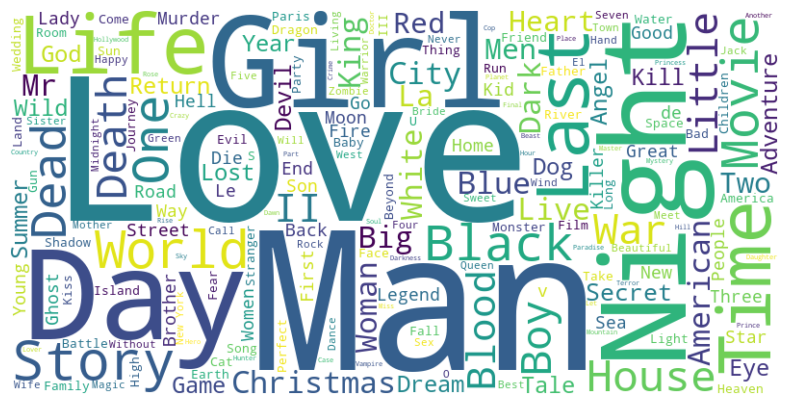

In [119]:
#Hacemos una nube de palabras para saber las palabras más utilizadas en los titulos de las peliculas
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(review for review in df['title'].dropna())

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras usando matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [130]:
import sklearn as sk

# Se hizo el respectivo EDA, y se determino que la columna 'title' es la que se usara para las recomendaciones
# Se vectorizan los títulos de las películas usando TF-IDF y se crea el modelo KNN

vectorizer = sk.feature_extraction.text.TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['title'])

knn = sk.neighbors.NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(tfidf_matrix)

# Se crea la función para obtener las recomendaciones
def get_recommendations(title, df, knn, vectorizer, top_n=5):
    # Buscar la película por el título, en caso de no encontrar se avisa, si no es exacto al título se muestran las películas que contienen el texto ingresado    
    indices_titulo = df[df['title'].str.lower() == title.lower()].index.tolist()
    if not indices_titulo:
        matching_movies = df[df['title'].str.lower().str.contains(title.lower())]
        if matching_movies.empty:
            return {"error": "No se encontró ninguna película con el título proporcionado."}
        else:
            return {
                "message": f"Se encontraron {matching_movies.shape[0]} películas con el título '{title}'.",
                "peliculas": matching_movies[['title', 'release_year']].to_dict(orient='records')
            }
    # Cuando el titulo es correcto, se procede con las recomendaciones
    
    # Se obtiene el vector TF-IDF del título
    title_vector = vectorizer.transform([title])

    # Se obtienen los índices y distancias de las películas similares
    distances, indices = knn.kneighbors(title_vector, n_neighbors=top_n + len(indices_titulo) + 5)

    # Se aplanan los índices y se obtienen las peliculas similares
    movie_indices = indices.flatten()
    movie_indices = [i for i in movie_indices if i not in indices_titulo]
    similar_movies = df.iloc[movie_indices]

    # Se asegura de que la popularidad sea float
    similar_movies.loc[:, 'popularity'] = similar_movies['popularity'].astype(float)

    # Y se ordena por popularidad en forma descendente
    similar_movies = similar_movies.sort_values(by='popularity', ascending=False)
    
    # Formatear los títulos para incluir la popularidad
    similar_movies['formatted_title'] = similar_movies.apply(lambda row: f"{row['title']} - Popularidad: {row['popularity']}", axis=1)

    # Excluir las películas originales de las recomendaciones
    similar_movies = similar_movies[~similar_movies['title'].str.lower().isin(df.loc[indices_titulo, 'title'].str.lower())]

    # Retornar los títulos de las películas recomendadas, excluyendo las películas originales
    return similar_movies['formatted_title'].head(top_n).tolist()

Recomendaciones para 'The Dark Knight':
['The Dark Knight (2008) - Popularidad: 123.167259', 'The Dark Knight Rises - Popularidad: 20.58258', 'First Knight - Popularidad: 15.178338', 'Knight and Day - Popularidad: 12.758942', 'Batman: The Dark Knight Returns, Part 2 - Popularidad: 12.576611']



In [129]:
# Se crea el endpoint para obtener las recomendaciones
@app.get("/recommendacion")
def recommendations(title: str):
    return get_recommendations(title, df, knn, vectorizer)


['The Dark Knight (2008) - Popularidad: 123.167259',
 'The Dark Knight Rises - Popularidad: 20.58258',
 'First Knight - Popularidad: 15.178338',
 'Knight and Day - Popularidad: 12.758942',
 'Batman: The Dark Knight Returns, Part 2 - Popularidad: 12.576611']